In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;} 
div.cell.code_cell.rendered{width:100%;} 
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;} 
div.text_cell_render.rendered_html{font-size:14pt;} 
div.output {font-size:14pt; font-weight:bold;} 
div.input {font-family:Consolas; font-size:14pt;} 
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;} 
div.text_cell_render ul li{font-size:12pt;padding:5px;} 
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)
# 1절 넘파이 패키지

In [4]:
import numpy as np
np.__version__

'1.23.5'

In [6]:
# np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
list(range(15))
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열- 정수, 실수, 문자열 모두 같은 타입만
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [18]:
from numpy import arange
a = arange(15,
         # dtype=np.int32  #  int는 기본 4byte- 8,16,32,64,128
          ).reshape(3,5)   # 3행 5열짜리 2차원 배열로 변환 
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [19]:
type(a)  # a변수의 타입 -n타입 array

numpy.ndarray

In [20]:
a.dtype  # a배열의 요소들의 type 

dtype('int32')

In [21]:
a.dtype.name

'int32'

In [22]:
a.itemsize  # a배열안의 한 요소의 bytesize

4

In [23]:
a.ndim  # 축수(차원수)

2

In [25]:
a.size  # 배열 데이터(요소)의 갯수

15

In [26]:
a.shape  # 배열의 구조(3행5열)

(3, 5)

In [29]:
print('shape조정 전 a\n', a)  # 배열로 출력
a.shape = (5,3)
print('shape조정 후 a\n', a)

shape조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [28]:
a   # 리스트로 출력

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

## 1.2 배열 타입 변경

In [30]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
a.size  # 요소 갯수

12

In [32]:
a.dtype

dtype('int32')

In [37]:
a.itemsize

8

In [34]:
a.dtype = np.int64    # 읽을 때 int64로(64bit씩) 읽는다.
a.dtype
#  array([[ 4294967296, 12884901890],
#        [21474836484, 30064771078],
#        [38654705672, 47244640266]], dtype=int64)  => 데이터 변질됨

dtype('int64')

In [38]:
a.size

6

In [40]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
a = a.astype('int64')  # 메소드로 조정하면 a의 값이 변경되는 것이 아니라서 할당해줘야한다.
# a.astype(np.int64)   # 속성의 값을 변경하지 말고 method로 조정해야한다.

In [45]:
a.itemsize  # 

8

In [46]:
a.size

12

In [47]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [48]:
a.ravel()    # flatten된 배열을 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [50]:
a.flatten()  # 함수의 결과가 return되면 배열은 수정안함.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷,io속도 개선)

In [51]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [55]:
%%time  
 #주피터노트북의 매직메소드(셀 첫라인에)
import pickle                          # 파일에 쓰기(압축안되고)
with open('data/ch10.pkl','wb') as f:
    pickle.dump(a, f)    

CPU times: total: 0 ns
Wall time: 810 µs


In [56]:
%%time  
with open('data/ch10.pkl','rb') as f:  # 파일을 읽기
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 2 ms


In [54]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [57]:
%%time
np.save('data/ch10.npy', a)   # 저장(압축해서)

CPU times: total: 0 ns
Wall time: 1.16 ms


In [58]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 11.6 ms


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random. ~ 
## 2.1 array() 함수로 넘파이 배열 만들기
- array(obj, [dtype=np.xx 나 'xx'], copy=T/F)   ->obj가 배열일때 copy필요


In [62]:
a = np.array([2, 4, 6], dtype=np.int16)   # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [63]:
a[0],a[1],a[2]

(2, 4, 6)

In [64]:
for i in a:
    print(i, end='\t')

2	4	6	

In [73]:
b = np.array([[1.5, 2.3],    # 배열은 동일 자료형의 집합  : 정수->실수->문자
             [4,  5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [74]:
b[0][1], b[0,1]  # 2차원 [axis0행, axis1열]

(2.3, 2.3)

In [75]:
l = [['1.5', '2.3'],  ['4', 'hello']]
l[0][1]

'2.3'

In [78]:
print(b.dtype)  # 정수 기본타입-int32, 실수 기본타입 - float64
print(b.itemsize)

float64
8


In [82]:
b = b.astype(np.float32)   # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [83]:
print(b.dtype)
print(b.itemsize)

float32
4


In [86]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()   # 개행

1.5	2.3	
4.0	5.0	


In [88]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행 {}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print()   # 개행

0행 0열 : 1.5(1.5)	0행 1열 : 2.3(2.3)	
1행 0열 : 4.0(4.0)	1행 1열 : 5.0(5.0)	


In [90]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [91]:
b[0,1]

2

In [94]:
b[3,1]   # 없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

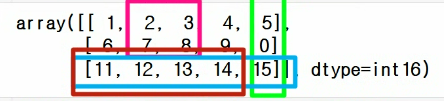

In [115]:
print('0~1행, 1~2열 :\n', b[0:2,1:3])     # 분홍색
print('2행 모두(1차원) :', b[2,:], b[2])   # 특정 행 모든 열을 추출할 경우 열 생략가능 -파랑
print('2행 모두(2차원) :', b[2:3,:], b[2:3])   
print('4열(마지막열)모두(1차원) :', b[:, 4], b[...,4], b[:,-1])    # 특정열, 모든행을 추출 -초록
print('2행 0~3열 :',b[2, 0:-1])       # 갈색
print('마지막열 제외 :\n',b[:, :-1])   # 맨 마지막열을 제외한 모든 값

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행 모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행 모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(마지막열)모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [124]:
# 스칼라변수
a = 10
copy_a = a  #  복사
print(f'a={a}, 복제본{copy_a}')
copy_a = -1  
print(f'a={a}, 복제본{copy_a}')

a=10, 복제본10
a=10, 복제본-1


In [125]:
# 데이터 구조
a = [0,1]
copy_a = a.copy()  # 깊은 복사
print(f'a={a}, 복제본{copy_a}')
copy_a[0] = -1  # 복제본
print(f'a={a}, 복제본{copy_a}')

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [130]:
# numpy 배열
c = np.array([[1,2],[3,4]])
# d = c    # 주소할당
d = np.array(c, copy=True)  # 깊은 복사  => d = c.copy()동일.  False는 
# d = np.array(c, copy=False)   # 얕은 복사(할당과 다르다)
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c),id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2951477077040 2951477077040
c=
[[9 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup): 요소들이 다 0  (이미지 필터 만들때)
- np.ones(tup) : 요소들이 다 1  (선형대수)
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성을 따로 지정 가능

In [134]:
x  = np.zeros((3,))  # 3열짜리 1차원 float64 배열(요소들은 다 0), 검정색 이미지
x = np.zeros( (3,2) ) # 3행2열짜리 2차원 float64 배열(요소들은 다 0)
# x = np.zeros( 3,2 ) # 에러
x = np.zeros( 3 ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [137]:
x  = np.zeros((2,5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [141]:
x  = np.ones((2,5), dtype=np.uint8)   # uint - unsigned int - 양수값만 =>이미지저장
x

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [143]:
np.full((2,3),-1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

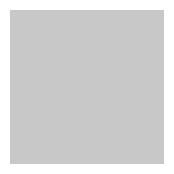

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))    # 시각화한 그래프 크기 figsize=(가로,세로)
img = np.full((28,28),200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)  # 이미지는 원래 컬러값이라 cmap='gray', vmin=0, vmax=255로 그레이스케일처리
plt.axis('off') # 축 없애기
plt.show()

In [157]:
import numpy as np
np.empty((3, 2))   #초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- **실수 난수** 
- np.random.random(tup): 0부터 1미만의 균등분포를 갖는 랜덤값 배열
- np.random.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생(난수n개)
- np.random.randn(n) : 표준정규분포(평균0,표준편차1) nomalization

cf) np.random.randint([from,] to): from(0)부터 to미만의 정수난수 1개 발생==random.randint(from, to-1)

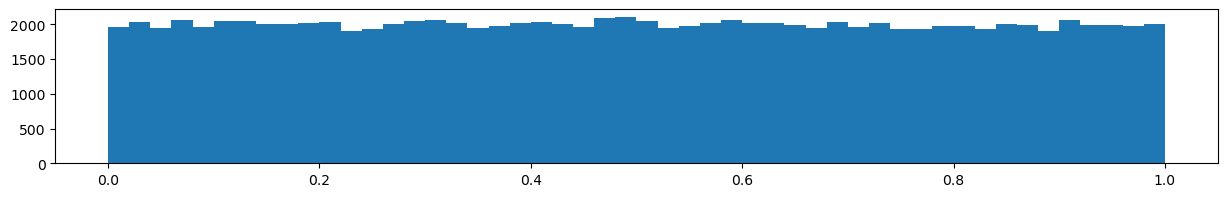

In [175]:
import matplotlib.pyplot as plt
x = np.random.rand(100000)
#print(x)
plt.figure(figsize=(15,2))   # 그래프 크기
plt.hist(x,bins=50)
plt.show()

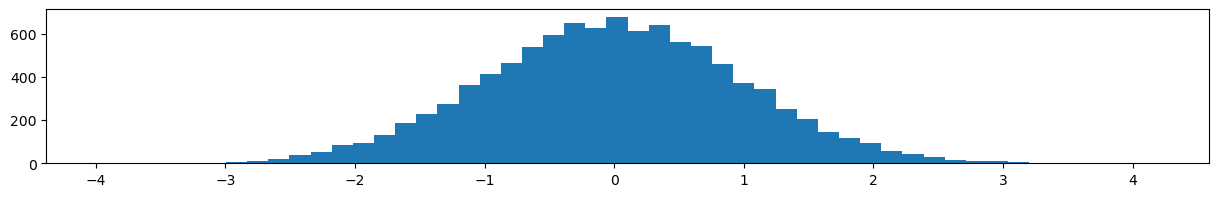

In [177]:
x = np.random.randn(10000)   # 정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)   표준편차가 작으면 적은양의 데이터로도 예측하기 쉽다.(신뢰도 높은 데이터)
plt.figure(figsize=(15,2))   # 그래프 크기
plt.hist(x,bins=50)
plt.show()

In [181]:
# 1차원 난수 배열
print(np.random.rand(3))    # 균등분포
print(np.random.randn(3))   # 정규분포

[0.67413276 0.54244328 0.65856688]
[ 0.12845519 -0.4696303  -0.33263909]


In [202]:
# 2차원 난수 배열
np.random.random((2,5))    # 2행 5열짜리 균등분포(0~1미만) 난수 배열

array([[0.82233088, 0.22913226, 0.53569073, 0.87070577, 0.17488954],
       [0.10431097, 0.68405977, 0.03205955, 0.45719039, 0.92014279]])

In [199]:
np.random.uniform(low=-2, high=2, size=(2,5))  #2행5열짜리 균등분포(-2~2미만) 난수 배열

array([[ 0.73764641,  1.22098299, -0.11781718, -0.51460925,  1.63565838],
       [-0.86970078,  1.49762078, -1.40358509, -0.4349951 ,  1.20377147]])

In [200]:
np.random.normal(size=(2,5))  #2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[-0.35188568, -0.1497148 ,  1.35643237,  1.35823619, -0.26465047],
       [-0.66167442, -1.57603911,  0.09349566, -2.0296155 , -1.92985934]])

In [201]:
np.random.normal(-1, 1, size=(2,5))  #2행5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([[-1.77771895, -1.45780889, -2.15262212, -1.64264322, -3.76753852],
       [-1.41625735,  1.34276036, -0.56507195, -2.91908615, -2.30259045]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성(reshape으로 차원늘림)
- np.linspac(from, to, num) : from부터 to(포함)까지 균등한 num개의 값 

In [204]:
np.arange(10, 30, 5, dtype=np.float64)   # float32 비추 (소숫점이하값 변질가능성)

array([10., 15., 20., 25.])

In [205]:
np.arange(0, 2.1, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

In [207]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [220]:
# linspace : 특정한 범위의 수들을 많이 생성할때 쓴다.
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

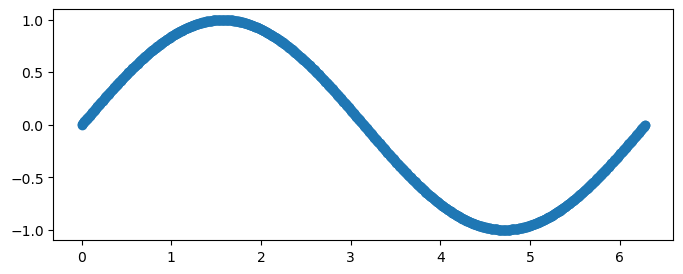

In [221]:
plt.figure(figsize=(8,3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 함수의 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [222]:
t = np.random.random((2,3))
t

array([[0.34386645, 0.16456296, 0.52846488],
       [0.01649265, 0.76782018, 0.30822757]])

In [225]:
a = np.round(t*10)
a

array([[3., 2., 5.],
       [0., 8., 3.]])

In [230]:
a = a.astype(np.int16)
a

array([[3, 2, 5],
       [0, 8, 3]], dtype=int16)

In [233]:
a = a.reshape(3,2)

In [235]:
a.reshape(-1,1)   # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[3],
       [2],
       [5],
       [0],
       [8],
       [3]], dtype=int16)

In [236]:
a.reshape(3,-1)

array([[3, 2],
       [5, 0],
       [8, 3]], dtype=int16)

In [243]:
a.resize(3,2)   # 실행결과가 출력 안 되면 a가 바뀜

In [241]:
a.resize(2, -1)  # resize는 -1 사용 불가

ValueError: negative dimensions not allowed

In [244]:
a

array([[3, 2],
       [5, 0],
       [8, 3]], dtype=int16)

In [245]:
# 전치행렬 (x행y열 ->y행x열) - 행과 열을 맞바꾼것
a.T  # a의 전치행렬

array([[3, 5, 8],
       [2, 0, 3]], dtype=int16)

In [246]:
a.transpose() # a의 전치행렬

array([[3, 5, 8],
       [2, 0, 3]], dtype=int16)

## 2.6 배열 출력

In [250]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [252]:
# 배열요소가 몇개까지 다 출력되나?  1000개 요소 이상은 생략되서 출력됨
np.get_printoptions()['threshold']

1000

In [253]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리 부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [ ]:
# 인쇄 옵션 변경

In [255]:
import sys
np.set_printoptions(threshold=sys.maxsize)  # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf)    # 무한대까지 출력가능